###  Build decision tree model to predict survival based on certain parameters
In this file using following columns build a model to predict if person would survive or not,
1.Pclass
2.sex
3.Age
4.Fare

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
new_df = df[['Pclass','Sex','Age','Fare']]
new_df.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [6]:
target = df['Survived']

In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     714 non-null    float64
 3   Fare    891 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 28.0+ KB


In [8]:
new_df.Age =new_df.Age.fillna(new_df.Age.mean())
new_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_5548\4032403440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.Age =new_df.Age.fillna(new_df.Age.mean())


,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     891 non-null    float64
 3   Fare    891 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 28.0+ KB


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
new_df['Sex_n'] = le.fit_transform(new_df['Sex'])
new_df


C:\Users\USER\AppData\Local\Temp\ipykernel_5548\3623861940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Sex_n'] = le.fit_transform(new_df['Sex'])


,Pclass,Sex,Age,Fare,Sex_n
0,3,male,22.000000,7.2500,1
1,1,female,38.000000,71.2833,0
2,3,female,26.000000,7.9250,0
3,1,female,35.000000,53.1000,0
4,3,male,35.000000,8.0500,1
...,...,...,...,...,...
886,2,male,27.000000,13.0000,1
887,1,female,19.000000,30.0000,0
888,3,female,29.699118,23.4500,0
889,1,male,26.000000,30.0000,1


In [12]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [13]:
new_df3 = new_df.drop('Sex', axis =1)
new_df3

,Pclass,Age,Fare,Sex_n
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(new_df3,target,test_size =.2 , random_state =10)

In [15]:
X_train.head()

,Pclass,Age,Fare,Sex_n
57,3,28.500000,7.2292,1
717,2,27.000000,10.5000,0
431,3,29.699118,16.1000,0
633,1,29.699118,0.0000,1
163,3,17.000000,8.6625,1


In [16]:
Y_train.head()

57     0
717    1
431    1
633    0
163    0
Name: Survived, dtype: int64

In [17]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [18]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [19]:
Y_predict =model.predict(X_test)
Y_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [20]:
Y_test

590    0
131    0
628    0
195    1
230    1
      ..
456    0
191    0
603    0
94     0
766    0
Name: Survived, Length: 179, dtype: int64

In [21]:
model.score(X_test,Y_test)

0.7988826815642458

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_predict)
cm

array([[96, 21],
       [15, 47]], dtype=int64)

Text(69.0, 0.5, 'Truth')

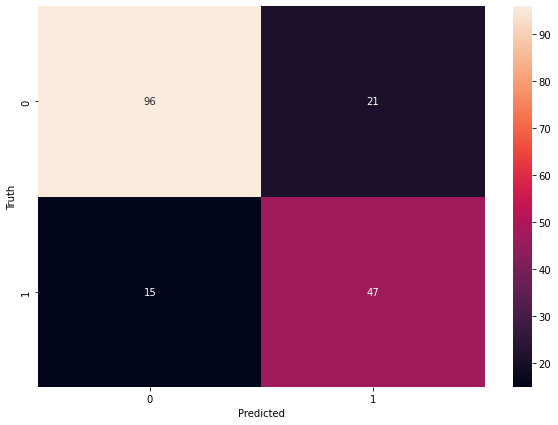

In [23]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize =(10,7))
sn.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [24]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       117
           1       0.69      0.76      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.80      0.80       179



In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_predict))

0.7988826815642458


### Using Logistic Classifier

In [26]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [27]:
model1.fit(X_train,Y_train)

LogisticRegression()

In [28]:
Y_predict1 = model1.predict(X_test)
Y_predict1

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [29]:
model1.score(X_test,Y_test)

0.8268156424581006

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_predict1)
cm

array([[102,  15],
       [ 16,  46]], dtype=int64)

Text(69.0, 0.5, 'Truth')

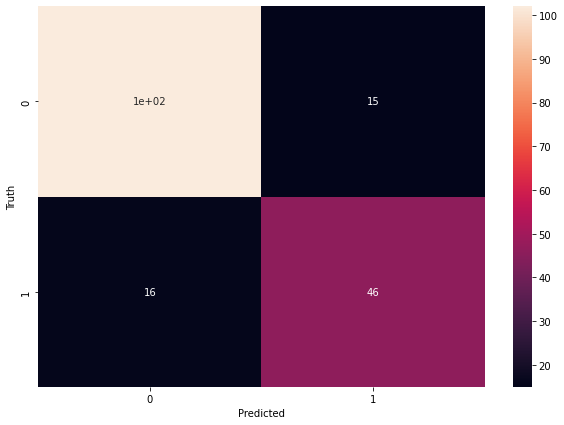

In [31]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize =(10,7))
sn.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       117
           1       0.69      0.76      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.80      0.80       179



In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

np.random.seed(42)

clf = RandomForestClassifier(n_jobs=1)

clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       117
           1       0.75      0.74      0.75        62

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



In [36]:
np.random.seed(42)

clf_2 = RandomForestClassifier(n_jobs=-1)

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

rs_clf = RandomizedSearchCV(estimator=clf_2,
                            cv=5,
                            param_distributions=grid,
                            n_iter=10,
                            verbose=2)

rs_clf.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   3.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [38]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10}

In [39]:
Y_pred_rs = rs_clf.predict(X_test)

print(classification_report(Y_test, Y_pred_rs))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       117
           1       0.80      0.79      0.80        62

    accuracy                           0.86       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179



In [40]:
confusion_matrix(Y_test, Y_pred_rs)

array([[105,  12],
       [ 13,  49]], dtype=int64)

In [41]:
confusion_matrix(Y_test, Y_predict1)

array([[102,  15],
       [ 16,  46]], dtype=int64)

In [42]:
confusion_matrix(Y_test, Y_predict)

array([[96, 21],
       [15, 47]], dtype=int64)

In [43]:
model1.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}